In [7]:
#extracting data from csv files into numpy arrays
from numpy import genfromtxt
import numpy as np
x_train = genfromtxt('train_data1.csv', delimiter=',')
y_train = genfromtxt('train_labels1.csv', delimiter=',')
x_test = genfromtxt('test_data1.csv', delimiter=',')
y_test = genfromtxt('test_labels1.csv', delimiter=',')

In [8]:
#shape
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((108, 180), (27, 180), (108,), (27,))

In [9]:
#converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes=9)
y_test = to_categorical(y_test, num_classes=9)
y_train.shape,y_test.shape

((108, 9), (27, 9))

In [10]:
#reshaping to 2D 
x_train=np.reshape(x_train,(x_train.shape[0], 36,5))
x_test=np.reshape(x_test,(x_test.shape[0], 36,5))
x_train.shape,x_test.shape

((108, 36, 5), (27, 36, 5))

In [11]:
#reshaping to shape required by LSTM
x_train=np.reshape(x_train,(x_train.shape[0], 36,5))
x_test=np.reshape(x_test,(x_test.shape[0], 36,5))

In [12]:
#shapes
x_train.shape,x_test.shape

((108, 36, 5), (27, 36, 5))

In [13]:
from keras import Sequential
from keras import optimizers
from keras.layers import Dense,Dropout,Activation,LSTM,SimpleRNN

In [14]:
model = Sequential()

In [15]:
#adding layers and forming the model
model = Sequential()
model.add(LSTM(256,activation="tanh", input_shape=(36,5), return_sequences=True))
model.add(Dropout(0.15))

model.add(LSTM(128, activation="tanh"))
model.add(Dropout(0.15))

model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.15))
model.add(Dense(units=9,activation='softmax'))

In [16]:
from keras.utils import plot_model
plot_model(model, to_file='LSTMmodel.png')

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [17]:
import tensorflow as tf
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_dtype=False,
    show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96
)

('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')


In [18]:
#compiling

model.compile(optimizer=optimizers.Adam(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
#fitting
history = model.fit(x_train,y_train,epochs=25,validation_data=(x_test,y_test),batch_size=40)

Epoch 1/25
3/3 [==============================] - 0s 163ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.8254 - val_accuracy: 0.8519
Epoch 2/25
3/3 [==============================] - 0s 123ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.8259 - val_accuracy: 0.8519
Epoch 3/25
3/3 [==============================] - 0s 128ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.8274 - val_accuracy: 0.8519
Epoch 4/25
3/3 [==============================] - 0s 123ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.8284 - val_accuracy: 0.8519
Epoch 5/25
3/3 [==============================] - 0s 125ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.8302 - val_accuracy: 0.8519
Epoch 6/25
3/3 [==============================] - 0s 123ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.8322 - val_accuracy: 0.8519
Epoch 7/25
3/3 [==============================] - 0s 123ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.8351 - val_accuracy: 0.8519
Epoch 8/25
3/3 [====

In [25]:
#Saving the model
import h5py
model.save('LSTMmodel.h5')

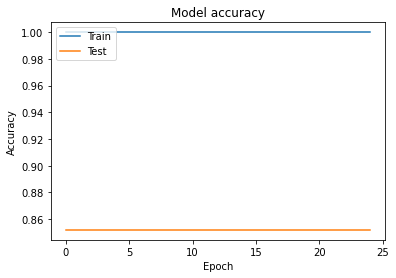

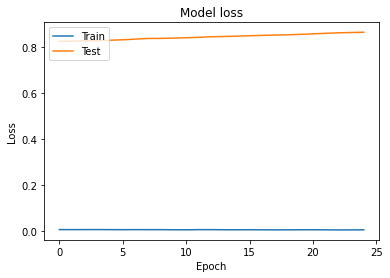

In [26]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [17]:
#train and test loss and scores respectively
train_loss_score=model.evaluate(x_train,y_train)
test_loss_score=model.evaluate(x_test,y_test)
print(train_loss_score)
print(test_loss_score)

1/1 [==============================] - 0s 41ms/step - loss: 0.8631 - accuracy: 0.6667
[0.22891321778297424, 0.9444444179534912]
[0.8630692958831787, 0.6666666865348816]


In [ ]:
x_test[2]

In [ ]:
y_test[2]

In [ ]:
from keras.models import load_model
model1 = load_model("LSTMmodel.h5")
model1.predict(np.array([[-4.33633179e+02,  6.14102974e+01, -1.43296366e+01,
         4.55003014e+01, -8.74559975e+00],
       [ 1.29582691e+01, -7.12582016e+00,  4.74118519e+00,
        -8.70848083e+00,  1.14978743e+01],
       [-1.25372562e+01,  4.71341181e+00,  5.64955950e+00,
        -1.82618475e+00,  2.45467377e+00],
       [-3.50646210e+00, -3.67841554e+00, -4.88692379e+00,
         1.38214827e+00, -5.13137341e+00],
       [-1.34057319e+00, -5.76654720e+00, -6.09698534e-01,
        -3.29549503e+00, -9.45865571e-01],
       [-2.95056909e-01, -9.53658700e-01, -2.16487765e+00,
        -1.28158331e+00, -2.54224014e+00],
       [-4.10138083e+00, -9.86345172e-01, -5.07865906e+00,
        -4.01453257e+00, -5.50663137e+00],
       [-2.48320150e+00,  1.54076290e+00,  1.75233018e+00,
         1.32074952e+00,  8.19460988e-01],
       [ 4.38646942e-01,  1.01708078e+00,  1.23925209e+00,
         6.83125198e-01,  3.13140541e-01],
       [ 3.69402021e-02,  4.08240519e-02,  3.66743542e-02,
         3.38127725e-02,  3.56622934e-02],
       [ 2.66733076e-02,  4.21579741e-02,  6.37496710e-02,
         2.54455686e-01,  2.91825861e-01],
       [ 1.03686877e-01,  6.09894916e-02,  6.31771460e-02,
         1.27410948e-01,  7.52563104e-02],
       [ 2.51841825e-02,  1.91368144e-02,  4.31273580e-02,
         1.18336633e-01,  5.66902719e-02],
       [ 1.86563823e-02,  4.72264970e-03,  1.90589647e-03,
         1.81526318e-03,  2.01533153e-03],
       [ 2.04839441e-03,  2.48364802e-03,  3.33801776e-01,
         3.62318248e-01,  3.75341684e-01],
       [ 4.35167998e-01,  4.83489811e-01,  4.08203304e-01,
         4.01220948e-01,  4.67599839e-01],
       [ 3.81513059e-01,  3.34868670e-01,  3.61110568e-01,
         3.42815220e-01,  3.10847044e-01],
       [ 3.21706444e-01,  3.00994515e-01,  3.08052540e-01,
         3.32533807e-01,  3.63182932e-01],
       [ 3.73650461e-01,  3.96633923e-01,  3.84437859e-01,
         3.64253670e-01,  3.50362033e-01],
       [ 3.27772111e-01,  3.14293027e-01,  3.17209512e-01,
         3.22816998e-01,  3.27199429e-01],
       [ 3.30961913e-01,  3.38543981e-01,  3.58884603e-01,
         3.79011124e-01,  3.47940534e-01],
       [ 3.64689380e-01,  3.46206367e-01,  3.23777884e-01,
         5.15812814e-01,  5.26563406e-01],
       [ 5.22288978e-01,  5.20673633e-01,  5.31087577e-01,
         5.54562151e-01,  5.04709244e-01],
       [ 4.95113313e-01,  4.82025146e-01,  4.26040232e-01,
         4.04145718e-01,  4.33748037e-01],
       [ 4.19691294e-01,  3.85986447e-01,  4.00616646e-01,
         4.57501620e-01,  7.01143265e-01],
       [ 6.10629857e-01,  3.49201620e-01,  3.42672914e-01,
         3.62239093e-01,  3.35107386e-01],
       [ 3.44348669e-01,  3.33932966e-01,  3.50242734e-01,
         3.95549476e-01,  4.19005990e-01],
       [ 4.53462631e-01,  4.38409358e-01,  4.25616443e-01,
         4.08112139e-01,  3.73924434e-01],
       [ 3.92427295e-01,  4.14020300e-01,  4.11141396e-01,
         4.47464347e-01,  1.00466348e-01],
       [ 8.05140554e-02,  9.55008981e-02,  1.12651015e-01,
         1.58473650e-01,  1.86450953e-01],
       [ 1.61218488e-01,  1.14809551e-01,  8.20229220e-02,
         5.98927406e-02,  3.45650116e-02],
       [ 3.45650116e-02,  1.87183854e-02,  2.51876105e-02,
         2.38499138e-02,  0.00000000e+00],
       [ 3.72778900e-01,  2.91268455e-01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.51875087e-02,  2.26372995e-02,
         1.50659717e-02,  4.50368740e-02],
       [ 9.04327966e-02,  1.36060854e-01,  1.06214687e-01,
         5.10919376e-02,  4.30758068e-02],
       [ 3.49176638e-02,  5.84905481e-02,  6.77465316e-02,
         5.34000101e-02,  7.43913963e-02]]))